In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Problem Statement:
Classify the water quality whether it is potable or not based on the features provided.

### Feature Details
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Read Data

In [4]:
df= pd.read_csv("water_potability.csv")

# Initial Analysis

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


There are 9 Independent features and 1 dependent features. Details for each features are provided in the above top. objective is to use the Potability feature as target feature for classification problem. Let is do more analysis to learn about the dataset better.

### Datatype of the features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [7]:
df['Potability']=df['Potability'].astype('category')

In [8]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

### Statistical analysis

In [9]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


From the above table, we can see that the count of each feature are not same. so there must me some null values.  
Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high.  
However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [10]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [11]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

### Check for missing values

In [12]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Features ph, Sulfate and Trihalomethanes are having null values. let us check those in details and find option to ha

In [13]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.

In [14]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [15]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

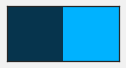

In [16]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

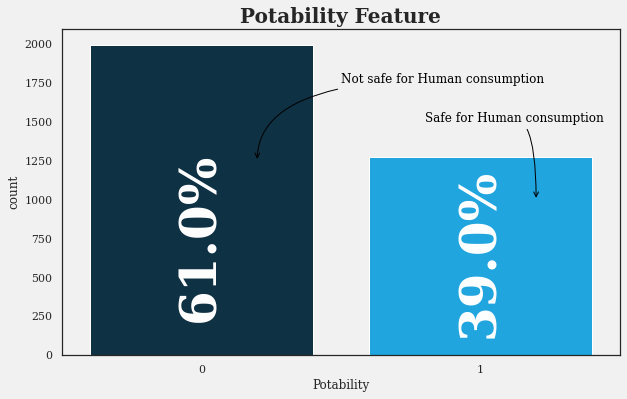

In [17]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

There is imbalance in the Target variable. which should be considered for modeling

### Distribution plots

In [18]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


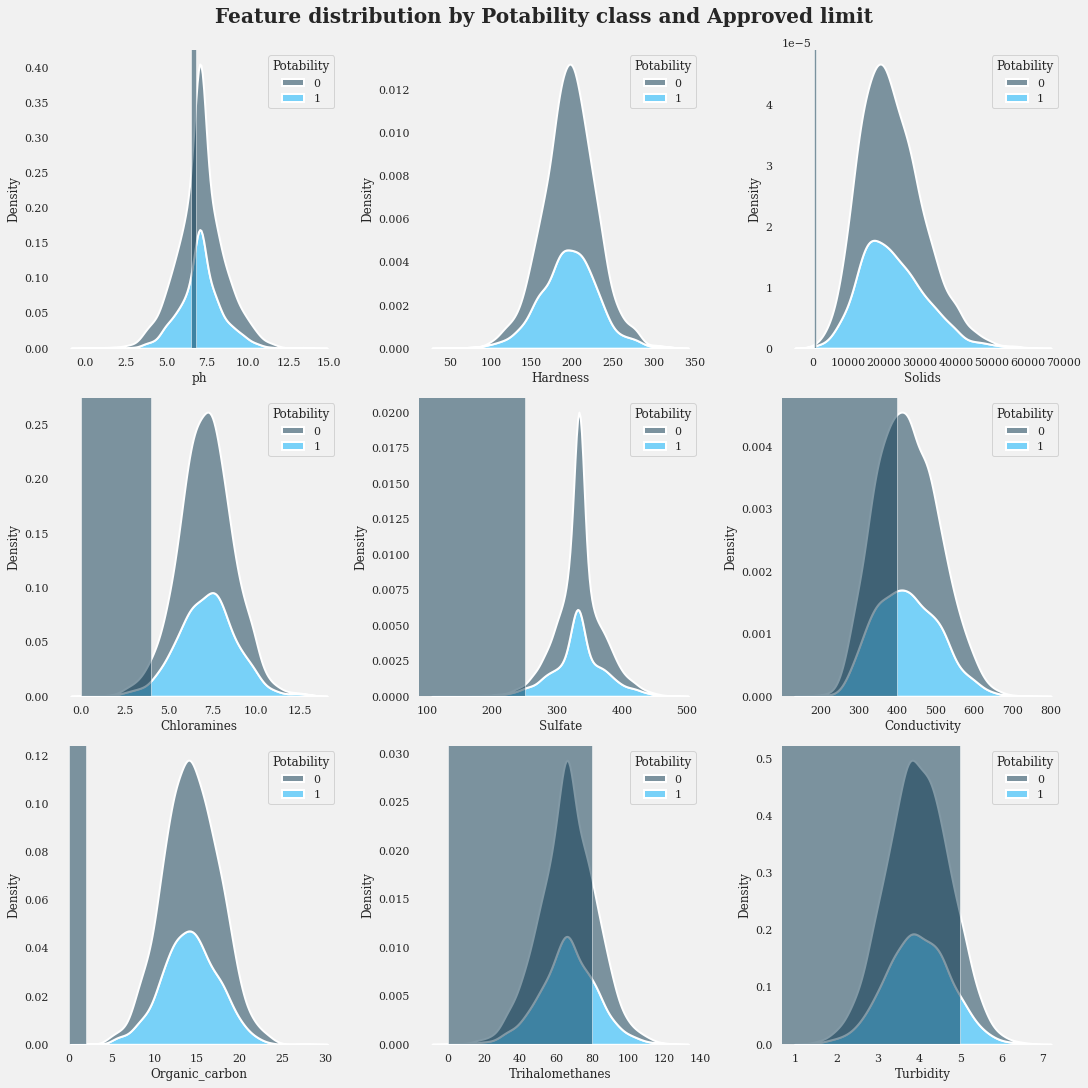

In [19]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

Based on the approved limit, we can clearly see the difference in the water classification. Ex: distribution of non potable water is high on conductivity compared to potable water. same applicable to Turbidity, Trihalomethanes.  
But, Ph value, Chloramines, Sulfate, Organic carbon presence doesn't show significant difference. I hope the hypothetical testing can help us here.

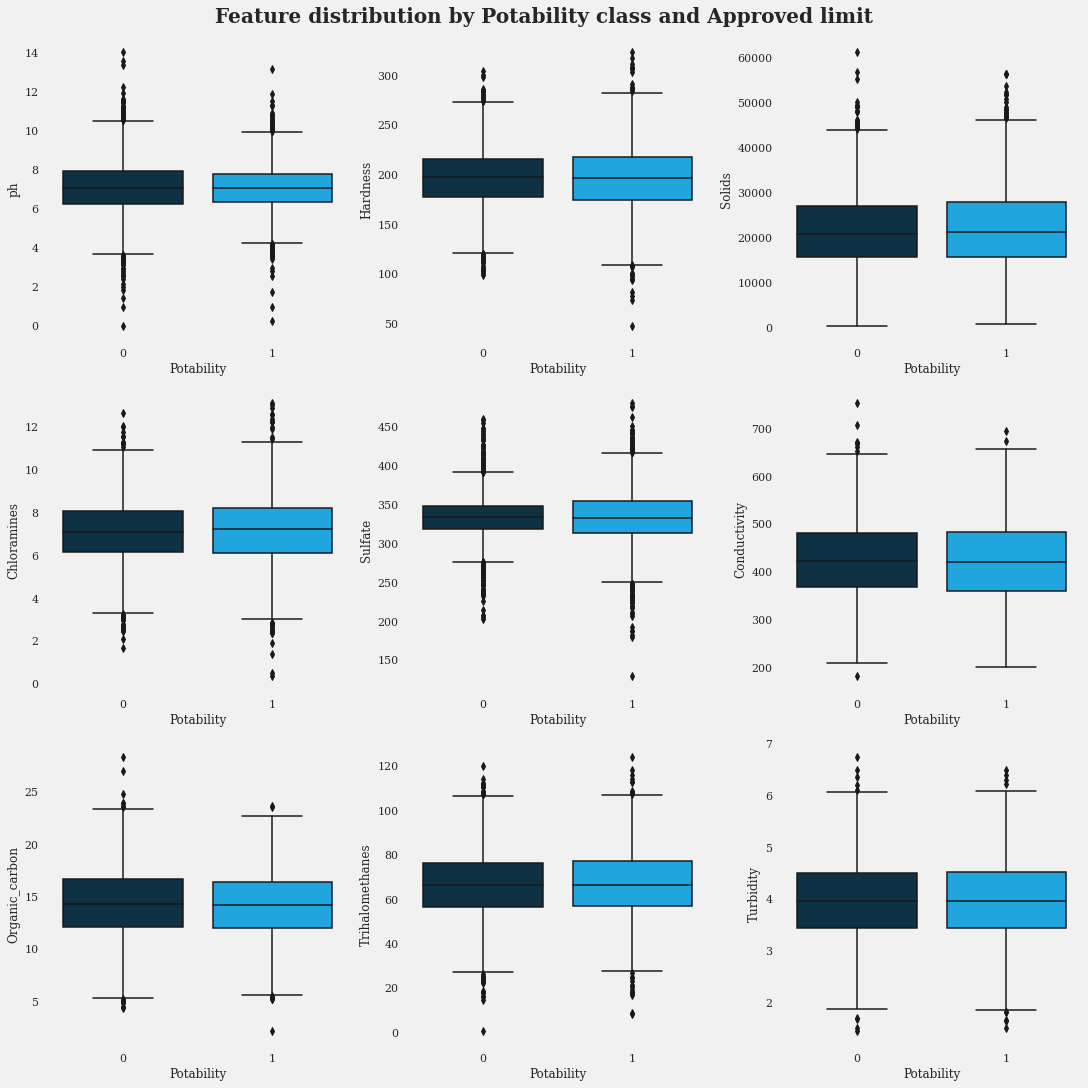

In [20]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

There are outliers in the dataset, we need to handle the same. 
most feature means are looks similar and there are very less differnce in variance. as mentioned in the above observation, Hypothesis testing would be the right option to identify the singnificance.

## Hypothesis testing

Ho (Null Hypothesis) - Mean for both samples/group are same  
H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.  
Significant level - 90%  
Alpha - 0.5% (ie., 0.1)  

p_value for ph is 0.8257362194511897 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074671 we accept the null hypothesis
p_value for Sulfate is 0.12292453703922816 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


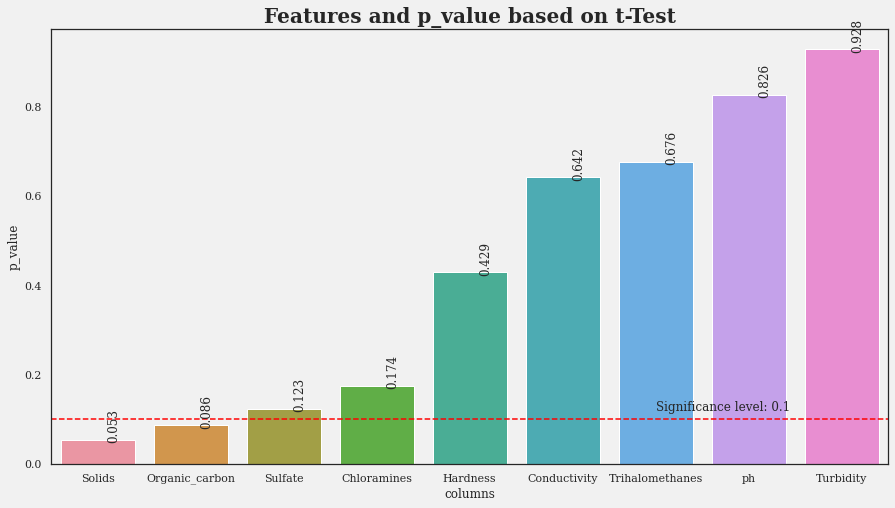

In [21]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

From the above Hypothesis testing, we can see that the features solid & Organic_carbon have significant difference in potable & non-potable water. other features shares similarities between two classes. 

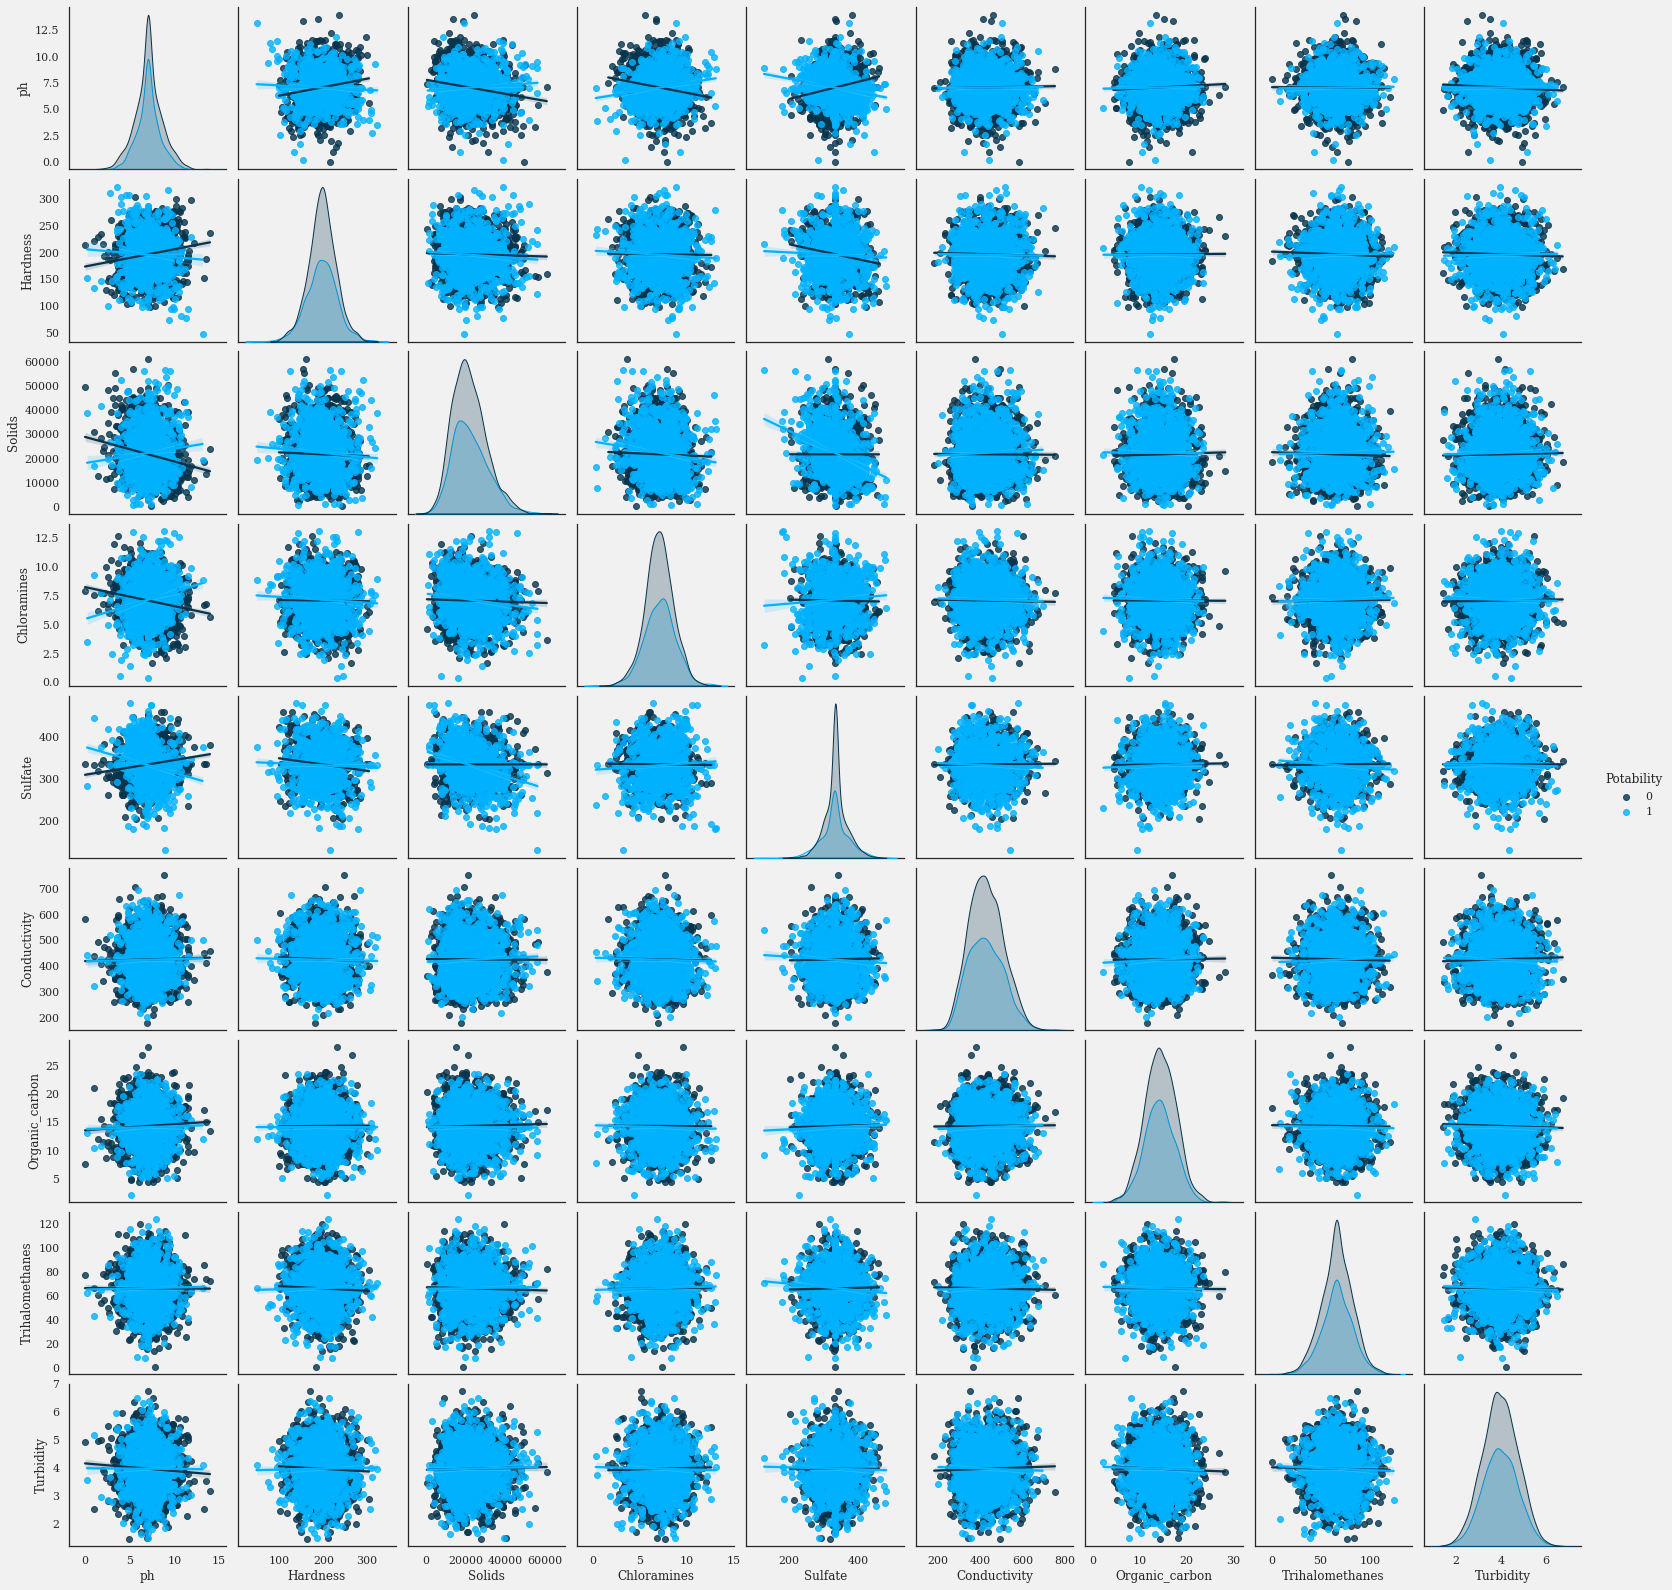

In [22]:
sns.pairplot(df, hue='Potability', kind='reg')

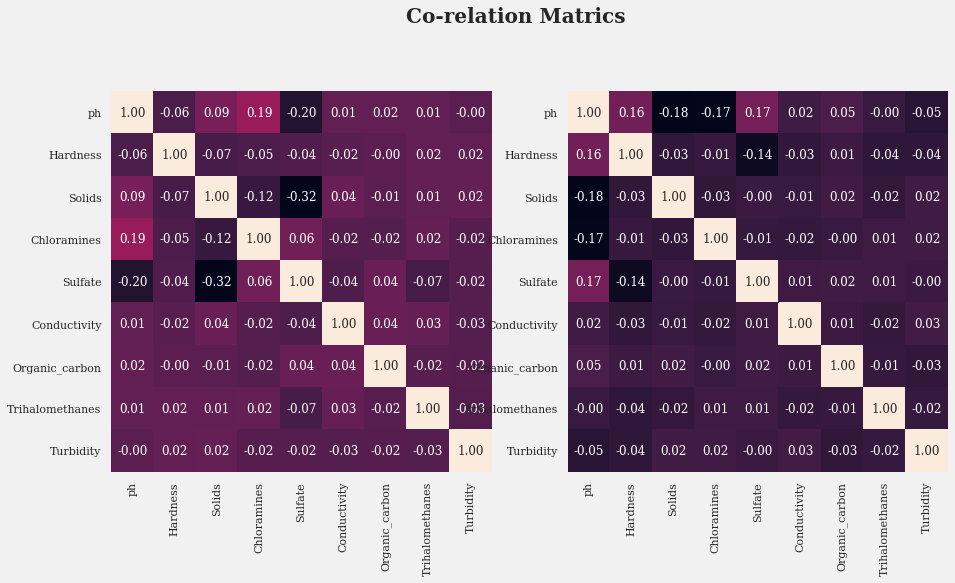

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

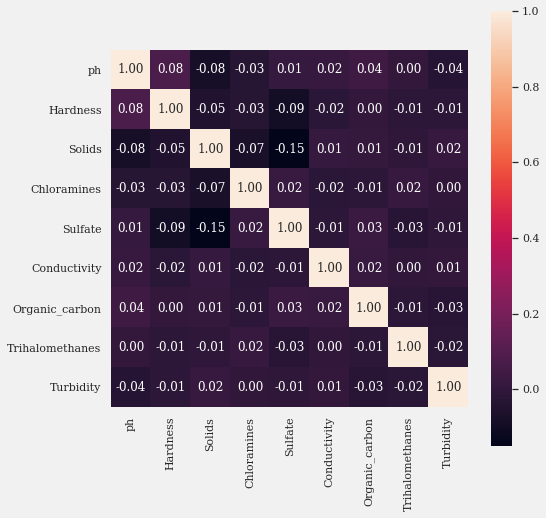

In [24]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.

#### PCA to check the explained variance

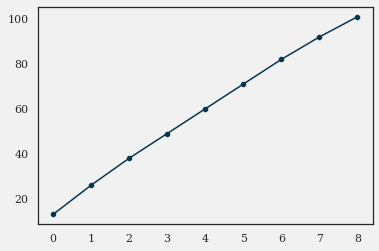

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

As mentioned above, all the feature are independent and doesn't share any linear relationship. we would need atleast 7 dimensions to explain 90% of the variations. so dimenstionality reduction doesn't make any change.

In [28]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [29]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.599798
5,KNeighborsClassifier(),0.648861
0,AdaBoostClassifier(),0.689179
3,DecisionTreeClassifier(),0.724792
1,BaggingClassifier(),0.748985
2,GradientBoostingClassifier(),0.757726


From the above basic modeling techinique, average cv score for GradientBoosting & BaggingClassifier is high compared to other models. so, let us try to do hyper tunning for these model to improve the accuracy

### lets try to fine tune the GradientBoosting & Bagging Classifier models

In [30]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 200} , Best Score : 0.763105295809599
Best Estimator: {'n_estimators': 600} , Best Score : 0.7762094636512322


***BaggingClassifier models gives slightly higher accuracy than the Gradientboosting model. further fine tuining could bring more accuracy score. I will stop here considering the computational time. lets try to predict the test dataset with best parameters from above cell and plot the confusion matrix and classification reports***

### Try prediciting Test data send and find the accuracy of the model

### GradientBoosting

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       510
           1       0.64      0.79      0.71       309

    accuracy                           0.75       819
   macro avg       0.75      0.76      0.75       819
weighted avg       0.77      0.75      0.76       819



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


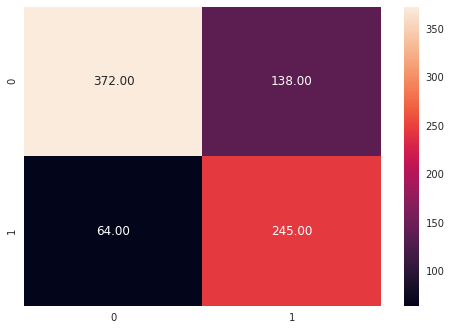

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

### BaggingClassifier

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       510
           1       0.68      0.71      0.70       309

    accuracy                           0.77       819
   macro avg       0.75      0.76      0.75       819
weighted avg       0.77      0.77      0.77       819



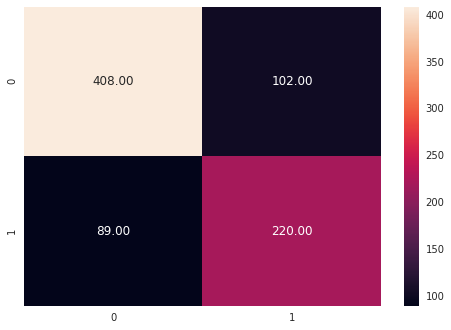

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [33]:
model.predict_proba(X_test)

array([[0.75  , 0.25  ],
       [0.5   , 0.5   ],
       [0.7125, 0.2875],
       ...,
       [0.    , 1.    ],
       [0.825 , 0.175 ],
       [0.6875, 0.3125]])

## Try with H2o AutoML

In [34]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/python/envs/default/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1ib5_1ja
  JVM stdout: /tmp/tmp1ib5_1ja/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1ib5_1ja/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_nqph7g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [35]:
h2o_df = h2o.H2OFrame(df)
h2o_df['Potability']=h2o_df['Potability'].asfactor()
X=h2o_df.columns[0:-1]
y=h2o_df.columns[-1]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [36]:
train, test=h2o_df.split_frame(ratios=[.7])
print(train.nrows)
print(test.nrows)

2302
974
